In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from pyecharts import Map, Geo

In [6]:
df = pd.read_csv('data frame.csv')

#How to select them?

We randomly selected 517 members of the Mafengwo Community named Fengshou club which is an extremely active community consisted of nearly 5000 users and they are self-service travel fanciers.

In fact, we admit each online travel platform is likely to occur user counterfeiting. So in order to guarantee the data validation as far as possible we can, we choose users who have participated the offline activities to make sure they are real people.

#Who are they?
The percentage of female kol travelers is 55% while male is 45%.Women is 10% more than men. So we can see female traveler is the main force of KOL tourism consumers on the website.

In [ ]:
from pyecharts import Pie
pie = Pie("Ratio of female and male kol tourists", subtitle="2009.1-2018.12",title_pos='left',width=900)
counts=pd.DataFrame(df['性别'].value_counts())
country=counts['性别']

pie.add("country_percent",counts.index,country ,center=[25,50],is_legend_show=True,legend_orient="vertical")

pie.render('male_female.html')



In [ ]:
from IPython.display import IFrame
IFrame('male_female.html', width=700, height=400)

In [8]:
df = pd.read_csv('data frame.csv')
# Therefore, super first-tier cities（Beijing，Shanhai，Guangzhou，Shenzhen）and many of new 
# first-tier cities（成都、杭州、重庆、武汉、苏州、西安、天津、南京、郑州、长沙、沈阳、青岛、宁波、东莞和无锡）
# are the target of governments' advertising campaign.Except for first-tier cities , 
# Kol travellers from Nanning ,Wenzhou and Dalian also deserve governments' advertising 
# attention.
# On the other hand, Taiwan ,Hangzhou and Xining's goverments city promotion should take 
# Hongkong travellers into account.

#Where are they form？
Among users’ location top 10, all of those users are from first-tier cities.Beijing tops the list, which is more than nearly half of Shanghai who ranks the 2nd.

In [ ]:
from pyecharts import Bar

bar = Bar("Chinese KOL Travellers Location Top10", "2009.1--2018.12")
city_counts=df['area'].value_counts()[:10].sort_values(ascending=False) #sort values
city = pd.DataFrame(city_counts)
y=bar.add("location", ["北京", "上海", "广州", "深圳", "成都", "杭州","西安","天津","重庆","苏州"], [80, 43, 25, 23, 23, 16,16,8,8,6])

# bar.print_echarts_options() # 该行只为了打印配置项，方便调试时使用
bar.render() 
y

In [10]:
df = pd.read_excel('Data cleaning of domestic footprints.xlsx')


#The correlation of choices between tourist cities:

In the matrix, we intend to illustrate the correlation between tourist cities choice of travelers. There are top 30 tourist cities. Briefly, deep orange color presents strong positive relation while light orange color represents weak relation. We intend to depend on their correlation to give some advice to one of the platform’s partners——the governments no matter the relation is strong or weak, positive or negative.

However, there is no such obvious cues for us to rely on which means the correlations between tourist cities choice of travelers are not strong.

Obviously the color of area consisted of Pingdong, Hualian, Gaoxiong and Taipei is deep orange which means people who travel to any one of these cities is more likely to go to the other cities.

As for domestic tourist cities which are contiguous to each other, the color on the matrix is much lighter which means that even though travelers go to one of these tourist cities, it is less likely for them to travel to other cities no matter the same journey or their later vacations.

As for domestic tourist cities which are contiguous to each other, the color on the matrix is much lighter which means that even though travelers go to one of these tourist cities, it is less likely for them to travel to other cities no matter the same journey or their later vacations.

In [11]:
a=df.corr()

/Users/chenmengjie/Desktop/friday/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  if sys.path[0] == '':


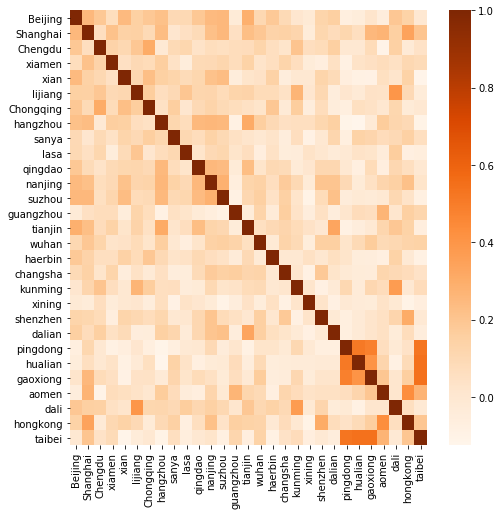

In [13]:
import scipy  # correlation between the domestic cities they have traveled to 
import scipy.cluster.hierarchy as sch
import numpy as np

df

X = df.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df1 = df.reindex_axis(columns, axis=1)

plt.figure(figsize=(8, 8))
# plt.matshow(df.corr())
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="Oranges")
# PiYG
#GnBu
